In [80]:
from importlib import reload
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.dates import datestr2num
from dateutil import parser
import cv2

from scipy.optimize import curve_fit

%matplotlib inline

In [76]:
import cedar_videos
reload(cedar_videos)
from cedar_videos import *


In [50]:
def convert_date_column(c):
    return parser.parse(bytes(c.replace(b'"', b''))).timestamp()

SBG_data = np.loadtxt(SBG_data_file, skiprows=4, converters = {0: convert_date_column}, delimiter=',')

In [51]:
SBG_data.shape

(71613, 5)

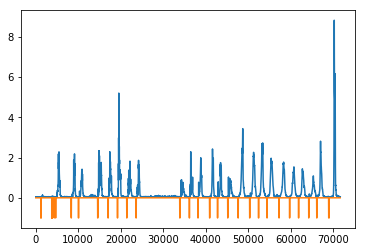

In [52]:
plt.plot(SBG_data[:,4])
plt.plot(SBG_data[:,2])

In [53]:
diff_ts = np.diff(SBG_data[:,0])

In [62]:
start_records = np.where(diff_ts > 10)[0]

In [65]:
print(repr(start_records))

array([ 8076,  8175,  9611, 11933, 16388, 18427, 21076, 22952, 33265,
       35552, 37707, 40327, 42354, 44475, 46780, 49746, 52132, 54115,
       56343, 59192, 61581, 63863, 65967, 68120])


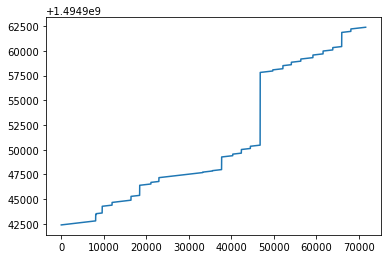

In [66]:
plt.plot(SBG_data[:,0])

/Users/jesse/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


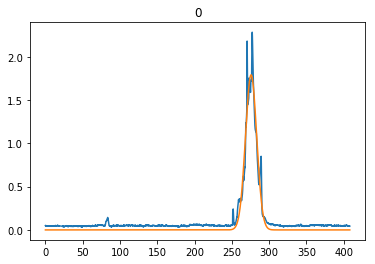

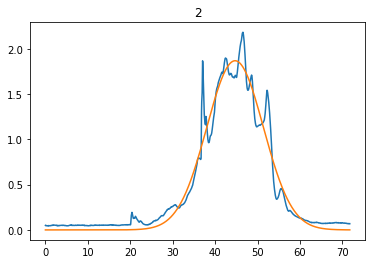

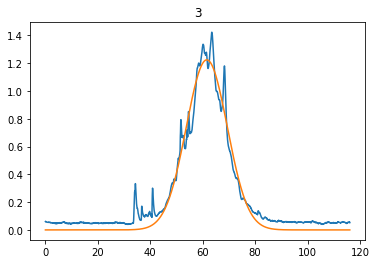

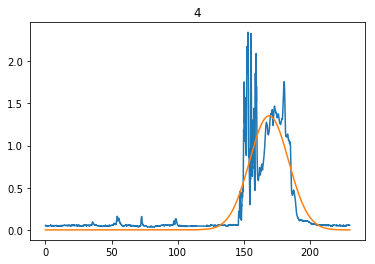

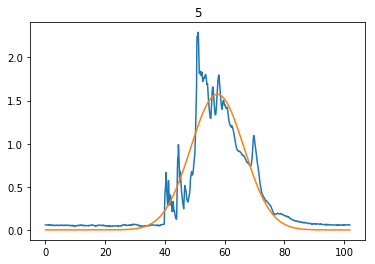

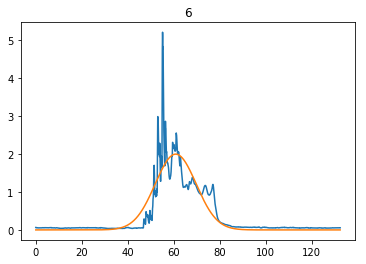

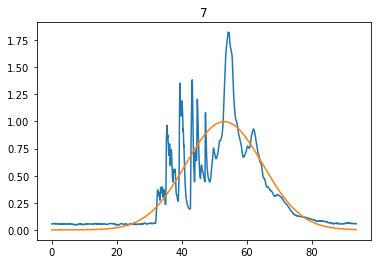

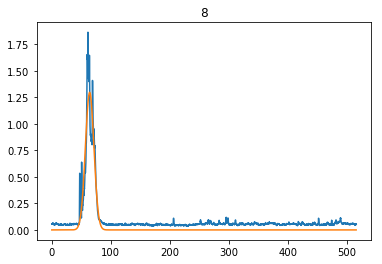

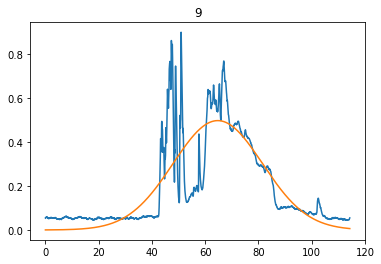

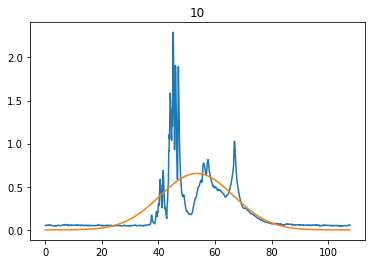

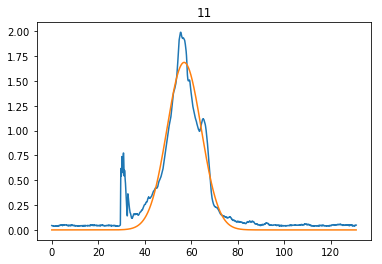

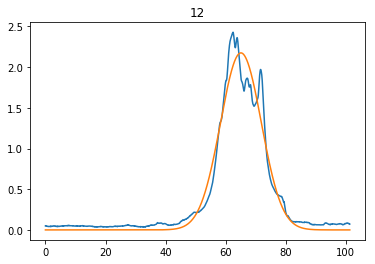

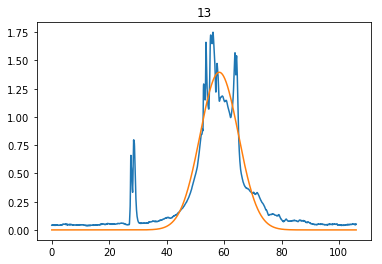

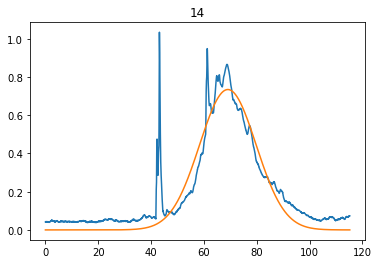

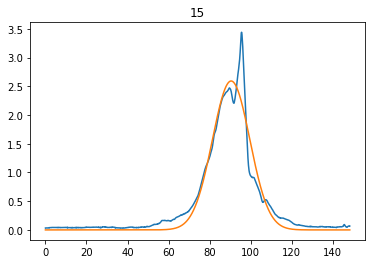

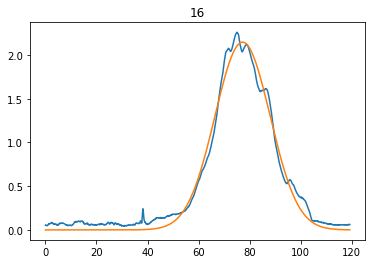

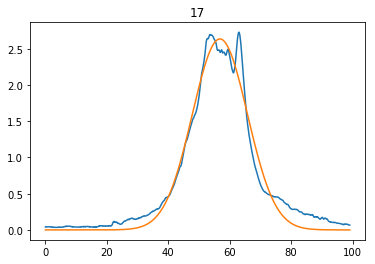

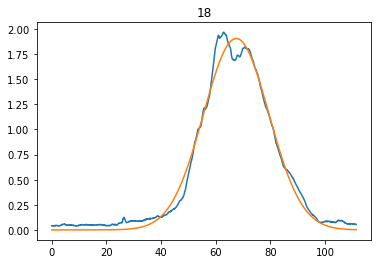

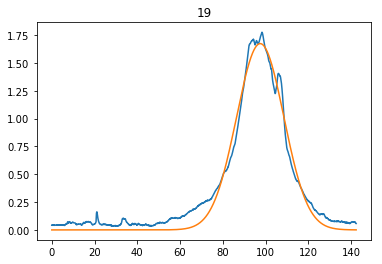

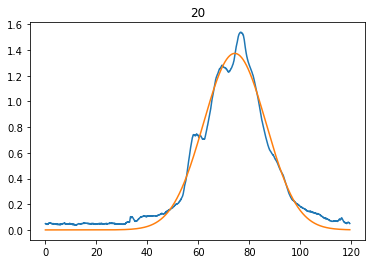

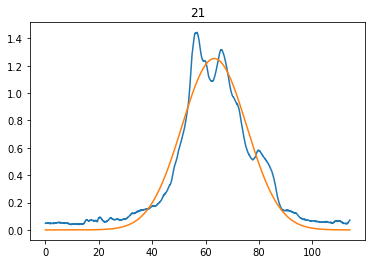

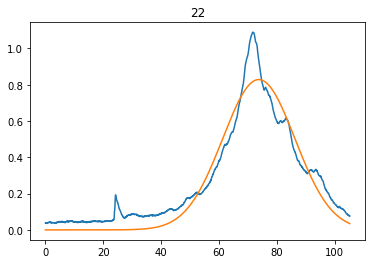

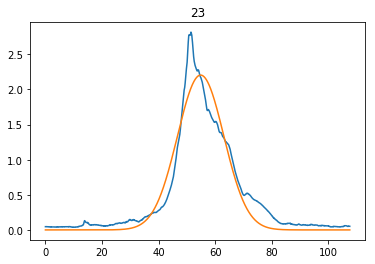

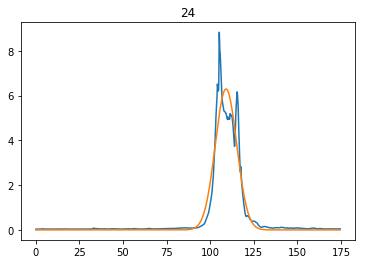

In [82]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]



for i in range(25):
    if i == 1:
        continue
    msmt_SBG_data = SBG_data[(SBG_records_splits[i]):SBG_records_splits[i+1],:]
    msmt_SBG_data[:,0] -= msmt_SBG_data[0,0]
    plt.figure()
    plt.plot(msmt_SBG_data[:,0], msmt_SBG_data[:,4])
    plt.title(str(i))
    
    p0 = [1., 60., 20.]
    
    coeff, var_matrix = curve_fit(gauss, msmt_SBG_data[:,0], msmt_SBG_data[:,4], p0=p0)
    # Get the fitted curve
    plot_fit = gauss(msmt_SBG_data[:,0], *coeff)

    plt.plot(msmt_SBG_data[:,0], plot_fit)

